In [82]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Treći domaći zadatak

### Učitavanje podataka i biranje proizvoljne longitude

In [83]:
h = np.loadtxt('topografija.dat', skiprows=2, unpack=True)
h = np.transpose(h)
longituda = np.arange(0.125, 360, step = 0.25)
latituda = np.arange(-89.875, 90, step=0.25)
longgrid, latgrid = np.meshgrid(longituda, latituda)

#proizvoljna longituda
long0 = 19.17


### Definisanje beselovog polinoma (kopirano iz nma_03)

In [84]:
def sredisnje_razlike(y):

    red = len(y)-1
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))

    y1 = y
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]

        y1 = razlike[i]

    sredisnje=[]

    for i in range(0,red):

        if red % 2 == 0:
            if i % 2 !=0:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])
            else:
                sredisnje.append(np.mean([razlike[i][int(len(razlike[i])/2) - 1],
                                          razlike[i][int(len(razlike[i])/2)]]))

        else:
            if i % 2 !=0:
                sredisnje.append(np.mean([razlike[i][int(int(len(razlike[i])/2)) - 1],
                                          razlike[i][int(int(len(razlike[i])/2))]]))
            else:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])

    return sredisnje

In [85]:
def besel(x, y, x0, red):

#==============================================================================
#     интерполација Беселовим полиномом
#==============================================================================
#     x,y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#     ред интерполационог полинома
#==============================================================================

    if np.mod(red,2)==0:
        print('Беселов полином мора бити непарног реда!')
        exit()

    h = x[1]-x[0]
    indeks = np.argwhere(x<x0)[-1][0]

    x = x[indeks-int(red/2):indeks+int(red/2)+2]
    y = y[indeks-int(red/2):indeks+int(red/2)+2]

    sredisnje = sredisnje_razlike(y)

    P = 0
    sredisnje = [(y[int(len(y)/2)-1]+y[int(len(y)/2)])/2.]+sredisnje
    q = (x0-x[int(len(x)/2)-1])/h
    qq = 1


    for i in range (0, int(len(x)/2)):

        if i==0:
            q_parno = 1
            q_neparno = q-0.5
        elif i==1:
            q_parno = q*(q-1)
            q_neparno = q*(q-1)*(q-0.5)
        else:
            qq = qq*(q**2-(i-1)**2)
            q_parno = q*(q-i)*qq
            q_neparno = q*(q-i)*(q-0.5)*qq

        P = P+q_parno/math.factorial(2*i)*sredisnje[2*i]
        P = P+q_neparno/math.factorial(2*i+1)*sredisnje[2*i+1]

    return P, x, y

### Interpolacija

Text(0, 0.5, 'Visina')

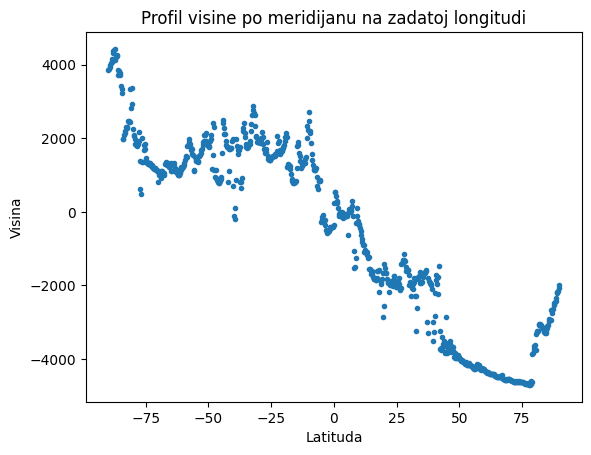

In [86]:
#za svaku latitudu tražimo visinu u zadatoj proizvoljnoj longitudi!
h_meridijan = np.zeros_like(latituda)
for i in range(len(latituda)):
    h_meridijan[i], a, b = besel(longituda, h[i], long0, red=5)




plt.plot(latituda, h_meridijan, '.')
plt.title('Profil visine po meridijanu na zadatoj longitudi')
plt.xlabel('Latituda')
plt.ylabel('Visina')


### Dodatna interpolacija - gušća interpolacija dobijenog profila

Text(0, 0.5, 'Visina')

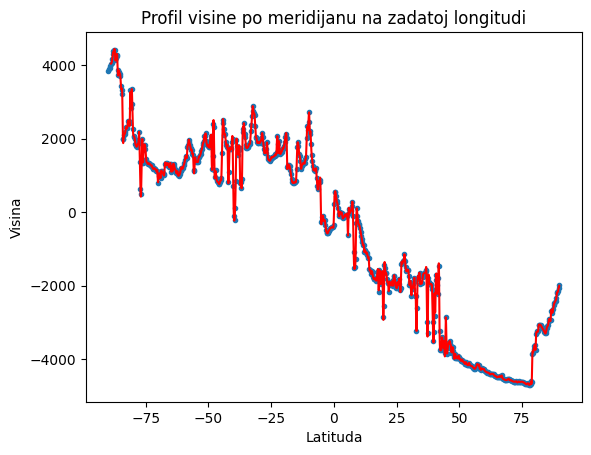

In [87]:
#tražimo tačke između već dobijenih tačaka za visinu po latitudi da bismo dobili gušći profil visine
#ovaj put interpolaciju radimo po latitudama između već poznatih visina na odabranom meridijanu, prošli put nam je svaka interpolacija išla po longitudi
korak = 0.1
latituda1 = np.arange(np.min(latituda)+1, np.max(latituda), step=korak)
h_meridijan1 = np.zeros(len(latituda1))
for i in range(len(latituda1)):

    h_meridijan1[i], a, b = besel(latituda, h_meridijan, latituda1[i], red=5) #h na gustim latitudama latituda1

plt.plot(latituda, h_meridijan, '.')
plt.plot(latituda1, h_meridijan1, 'r-')
plt.title('Profil visine po meridijanu na zadatoj longitudi')
plt.xlabel('Latituda')
plt.ylabel('Visina')
